# cpa01

This dataset contains data about the House Price Index (HPI)

https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx

# Question 1: What are the top 10 places with the highest seasonally adjusted HPI?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('HPI_master.csv')
df

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.93,100.98
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.33,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.71,101.00
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37
...,...,...,...,...,...,...,...,...,...,...
118115,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2020,4,185.46,181.28
118116,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,1,189.00,196.98
118117,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,2,194.86,192.58
118118,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,3,199.61,198.80


In [3]:
hdf = df.groupby(['place_name','frequency','yr','period'])
hdf = hdf['index_sa'].agg(np.mean)
hdf = hdf.sort_values(ascending=False)
hdf.head(10)

place_name                        frequency  yr    period
Salt Lake City, UT                quarterly  2021  4         725.720
Austin-Round Rock-Georgetown, TX  quarterly  2021  4         713.090
Salt Lake City, UT                quarterly  2021  3         699.550
Austin-Round Rock-Georgetown, TX  quarterly  2021  3         693.730
Boise City, ID                    quarterly  2021  3         681.690
                                                   4         678.260
Utah                              quarterly  2021  4         671.990
Austin-Round Rock-Georgetown, TX  quarterly  2021  2         663.760
Salt Lake City, UT                quarterly  2021  2         659.290
Denver-Aurora-Lakewood, CO        quarterly  2021  4         658.145
Name: index_sa, dtype: float64

# Question 2: How does the seasonally adjusted HPI change over the years for each location?

In [16]:
hdf_temp = df[df['frequency'] == 'monthly']
region_hdf = hdf_temp[hdf_temp['place_name'].str.contains('Division')]
region_hdf

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.93,100.98
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.33,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.71,101.00
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37
...,...,...,...,...,...,...,...,...,...,...
3343,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,8,361.07,356.74
3344,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,9,366.99,363.27
3345,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,10,367.96,366.33
3346,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,11,371.78,370.90


In [17]:
hpi_column = 'index_sa' 
region_hdf = pd.pivot_table(region_hdf, values = hpi_column, index = ['yr'], columns = ['place_name'])
region_hdf

place_name,East North Central Division,East South Central Division,Middle Atlantic Division,Mountain Division,New England Division,Pacific Division,South Atlantic Division,West North Central Division,West South Central Division
yr,,,,,,,,,
1991,101.731667,101.159167,99.565000,101.368333,99.415000,100.128333,100.604167,100.764167,100.668333
1992,106.033333,104.838333,101.095833,107.499167,98.113333,100.175000,102.631667,104.450000,103.585833
1993,110.740000,109.328333,101.382500,116.454167,96.161667,97.571667,104.781667,109.850000,107.738333
1994,116.460833,115.466667,101.596667,127.904167,96.909167,96.321667,108.257500,115.918333,112.407500
1995,122.005833,120.631667,101.190833,135.435000,97.448333,95.615833,111.356667,120.935833,115.380000
1996,127.961667,125.893333,102.049167,141.400833,100.109167,95.814167,114.635000,126.357500,118.621667
1997,132.478333,130.222500,103.236667,145.949167,102.980833,98.435000,117.830000,130.996667,121.629167
1998,137.989167,135.226667,107.109167,151.719167,109.916667,106.143333,122.570833,137.761667,127.335000
1999,145.225000,141.085000,113.708333,159.824167,120.340000,115.183333,129.206667,146.548333,134.342500


Text(0.5, 1.0, 'HPI by Region')

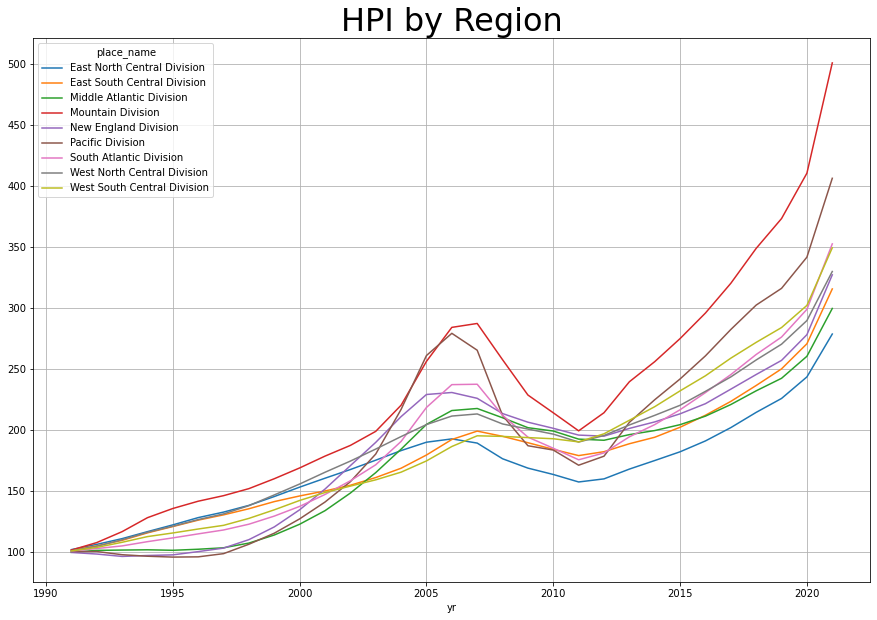

In [18]:
region_hdf.plot(figsize=(15,10))
plt.grid()
#For monthly frequency HPI values
plt.title('HPI by Region',fontsize=32)

# Question 3: Does Geography Correlate with Seasonally Adjusted HPI values?